## Oasis Infobyte Internship
###  Sales Prediction Task no 5

In [1]:
import numpy as np
import pandas as pd

In [2]:
#reading the csv file

df=pd.read_csv('/kaggle/input/advertisingcsv/Advertising.csv')

In [3]:
#displaying random 10 datas from dataset

df.sample(10)

,Unnamed: 0,TV,Radio,Newspaper,Sales
76,77,27.5,1.6,20.7,6.9
117,118,76.4,0.8,14.8,9.4
137,138,273.7,28.9,59.7,20.8
19,20,147.3,23.9,19.1,14.6
168,169,215.4,23.6,57.6,17.1
124,125,229.5,32.3,74.2,19.7
121,122,18.8,21.7,50.4,7.0
150,151,280.7,13.9,37.0,16.1
171,172,164.5,20.9,47.4,14.5
44,45,25.1,25.7,43.3,8.5


In [4]:
#displaying the number of rows and columns

df.shape

(200, 5)

In [5]:
#displaying the information of the csv file

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [6]:
#1st column is not needed so let's drop it

df=df.iloc[:,1:]

In [7]:
df.sample()

,TV,Radio,Newspaper,Sales
95,163.3,31.6,52.9,16.9


In [8]:
#checking for null values

df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [9]:
#checking for null values

df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [10]:
#statistical description

df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [11]:
#removing the outlier

df=df[df['Newspaper']<=100]

In [12]:
df.shape

(198, 4)

In [13]:
#data visualtzation

import matplotlib.pyplot as plt
import seaborn as sns

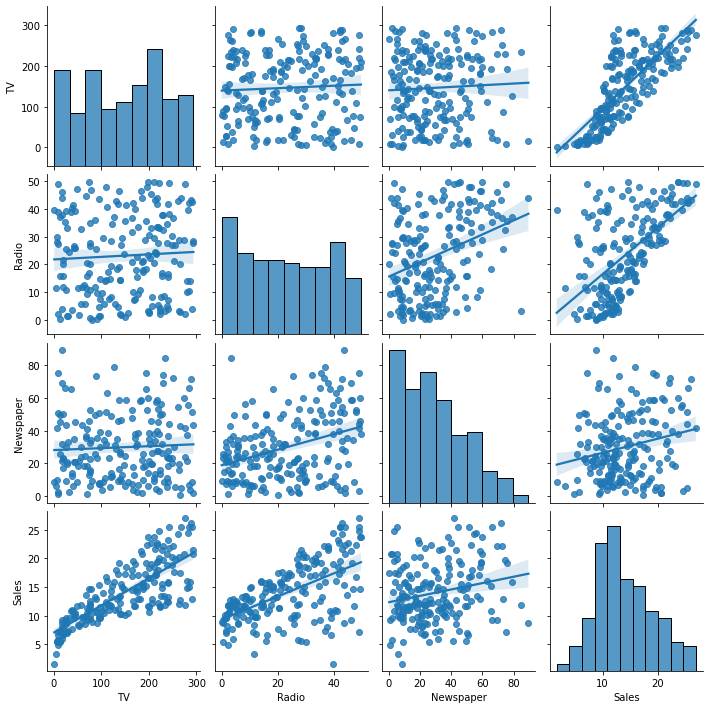

In [14]:
sns.pairplot(df,kind="reg")

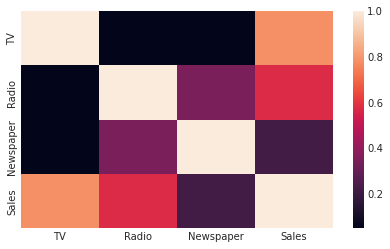

In [15]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(7,4))
sns.heatmap(df.corr())
plt.show()

In [16]:
#seperating the input and output data
#x=pd.DataFrame([[df.TV,df.Radio,df.Newspaper]])

x=df.drop(columns=['Sales'])
y=df['Sales']

In [17]:
x.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [18]:
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

In [19]:
# seperating training and testing data

from sklearn.model_selection import train_test_split

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [21]:
x_train.head()

,TV,Radio,Newspaper
43,206.9,8.4,26.4
134,36.9,38.6,65.6
65,69.0,9.3,0.9
162,188.4,18.1,25.6
151,121.0,8.4,48.7


In [22]:
y_train.head()

43     12.9
134    10.8
65      9.3
162    14.9
151    11.6
Name: Sales, dtype: float64

In [23]:
#model building


from sklearn.preprocessing import OneHotEncoder, StandardScaler,OrdinalEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [24]:
column_trans=make_column_transformer((OneHotEncoder(sparse=False),[]),remainder='passthrough')
scaler=StandardScaler()
oe=OrdinalEncoder()

In [25]:
#Random Forest Regression Model

from sklearn.ensemble import RandomForestRegressor
r=RandomForestRegressor(n_estimators=10,random_state=0)
pipe=make_pipeline(column_trans,scaler,r)
pipe.fit(x_train,y_train)
y_pred_r=pipe.predict(x_test)
r2_score(y_test,y_pred_r)

0.9760585977659622

In [26]:
#checking our prediction

pipe.predict([[283.6,42.0,66.2]])

array([24.82])

In [ ]:
# THANK YOU